In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Times New Roman + SimSun + WFM Sans SC']
plt.rcParams['mathtext.fontset']='stix'
# Times New Roman + SimSun + WFM Sans SC
# simsum宋体, times new roman -*, simhei黑体, kaiti楷体, 
# dengxian等线, fangsong仿宋, Microsoft Yahei微软雅黑
plt.rcParams['axes.unicode_minus']=False   
plt.rcParams['figure.dpi'] = 200
# plt.rcParams['figure.figsize'] = [4, 3]
# plt.rcParams['font.size'] = 12
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'

### 1
平均值的置信区间

In [2]:
data = np.array([1050, 1100, 1120, 1250, 1280])
n = len(data)
mu = np.mean(data)
sig = np.std(data, ddof=1)
SEM = ss.sem(data)
a = 0.10
ta = ss.t.ppf(1 - a/2, n-1)
L = [mu - SEM*ta, mu + SEM*ta]
L

[1064.89955998421, 1255.10044001579]

### 2
非参数假设检验

In [3]:
data = np.loadtxt('../../../hw/09第9章  数据的描述性统计方法习题解答/ti9_2.txt').flatten()
mu = data.mean()
sig = data.std(ddof=1)
st, p = ss.kstest(data, 'norm', (mu, sig))
print("统计量：", st)
print("p值：", p)

统计量： 0.07971577846007427
p值： 0.8833503491306954


$D_n=0.0797<1.36/\sqrt{n}=0.1923$，故接受原假设，即滚珠直径服从正态分布 $N(15.0780, 0.4325^2)$

### 3
单因素方差分析

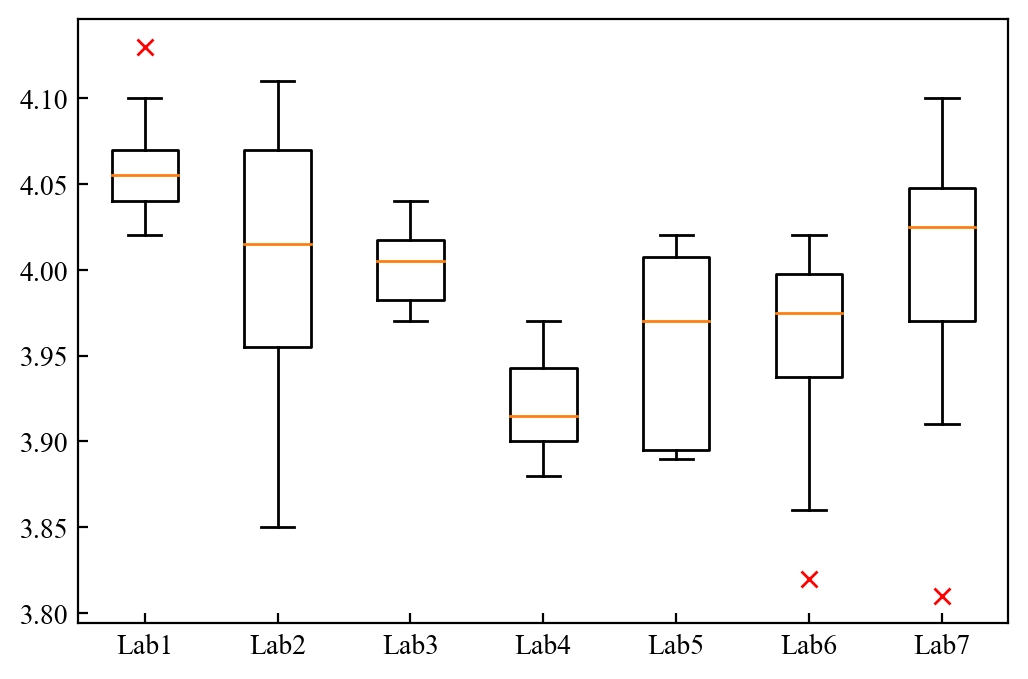

In [4]:
df = pd.read_excel('../../../hw/09第9章  数据的描述性统计方法习题解答/ti9_3.xlsx', header=None)
fig = plt.figure()
ax = fig.add_subplot(111)
labels = ['Lab'+str(i) for i in range(1, 8)]
ax.boxplot(df, sym='xr', labels=labels)
fig.show()

In [5]:
y = df.values
x = np.tile(np.arange(1, 8), (10, 1))
model_dic = {'x': x.flatten(), 'y': y.flatten()}
model = sm.formula.ols('y~C(x)', model_dic).fit()
anovat = sm.stats.anova_lm(model)
anovat

,df,sum_sq,mean_sq,F,PR(>F)
C(x),6.0,0.124737,0.020790,5.660069,0.000095
Residual,63.0,0.231400,0.003673,NaN,NaN


${\rm PR}=0.000095<0.05$，拒绝 $H_0$，即认为各实验室测量的扑尔敏的有效含量的均值有显著差异

### 4
双因素方差分析（交互）

In [6]:
data = np.loadtxt('../../../hw/09第9章  数据的描述性统计方法习题解答/ti9_4.txt')
x1 = np.tile(np.arange(1, 4), (12, 1)).T
x2 = np.tile(np.array([1,1,1,2,2,2,3,3,3,4,4,4]), (3, 1))
model_dic = {'x1': x1.flatten(), 'x2': x2.flatten(), 'y': data.flatten()}
model = sm.formula.ols('y~C(x1)*C(x2)', model_dic).fit()
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(x1),2.0,13.166667,6.583333,5.266667,1.269617e-02
C(x2),3.0,125.000000,41.666667,33.333333,1.009190e-08
C(x1):C(x2),6.0,68.833333,11.472222,9.177778,2.887221e-05
Residual,24.0,30.000000,1.250000,NaN,NaN


因为 $p$ 值均小于 $0.05$，故可拒绝均值相等假设，即认为不同品种（因素 $A$）、不同化肥（因素 $B$）对小麦产量有显著影响，交互作用也是显著的

### 5
三因素方差分析

In [7]:
data = np.loadtxt('../../../hw/09第9章  数据的描述性统计方法习题解答/ti9_5.txt')
x1 = np.vstack([np.ones((4, 4)), np.ones((4, 4))*2, np.ones((4, 4))*3])
x2 = np.tile(np.array([[1, 1, 2, 2]]).T, (3, 4))
x3 = np.tile(np.array([[1, 2]]).T, (6, 4))
model_dic = {
    'x1': x1.flatten(),
    'x2': x2.flatten(),
    'x3': x3.flatten(),
    'y': data.flatten()
}
model = sm.formula.ols('y~C(x1)+C(x2)+C(x3)', model_dic).fit()
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(x1),2.0,38195.791667,19097.895833,42.654788,6.194437e-11
C(x2),1.0,18565.333333,18565.333333,41.465319,8.387889e-08
C(x3),1.0,10034.083333,10034.083333,22.410935,2.406774e-05
Residual,43.0,19252.458333,447.731589,NaN,NaN


因为 $p$ 值均小于 $0.05$，故可拒绝均值相等假设，即认为不同地理位置、不同广告、不同装潢下的销售量均有显著差异

### 6
#### 自动化车床管理
> 1999年国赛A题

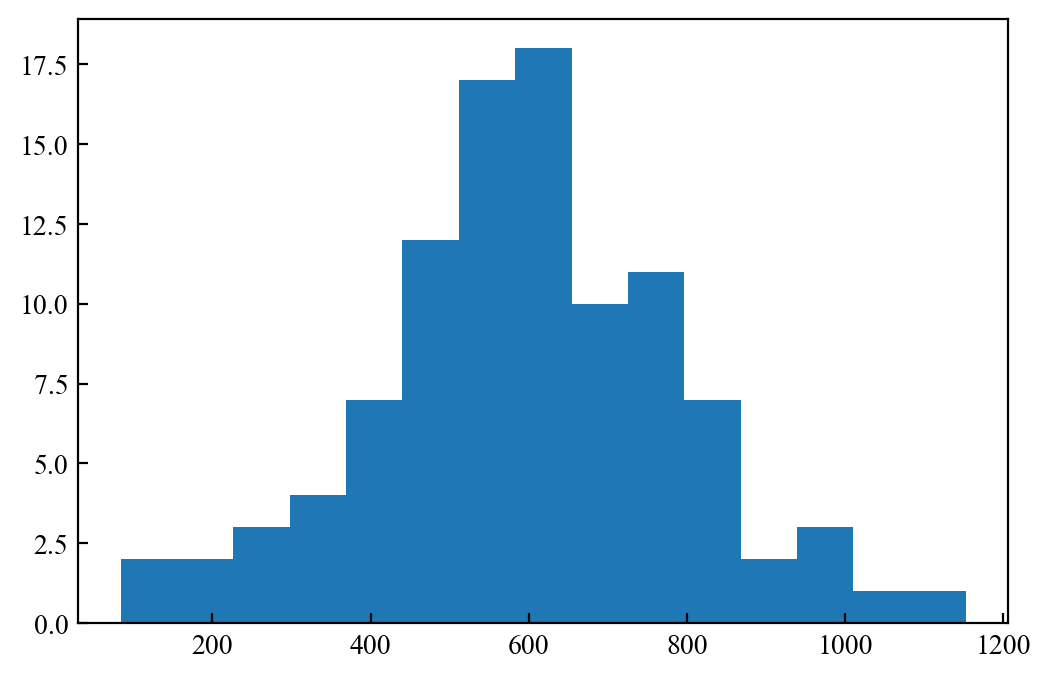

In [8]:
data = np.loadtxt('../../../hw/09第9章  数据的描述性统计方法习题解答/ti9_6.txt').flatten()
plt.hist(data, 15)
plt.show()

1）

In [9]:
mu = data.mean()
sig = data.std(ddof=1)
mu, sig

(600.0, 196.6291695121309)

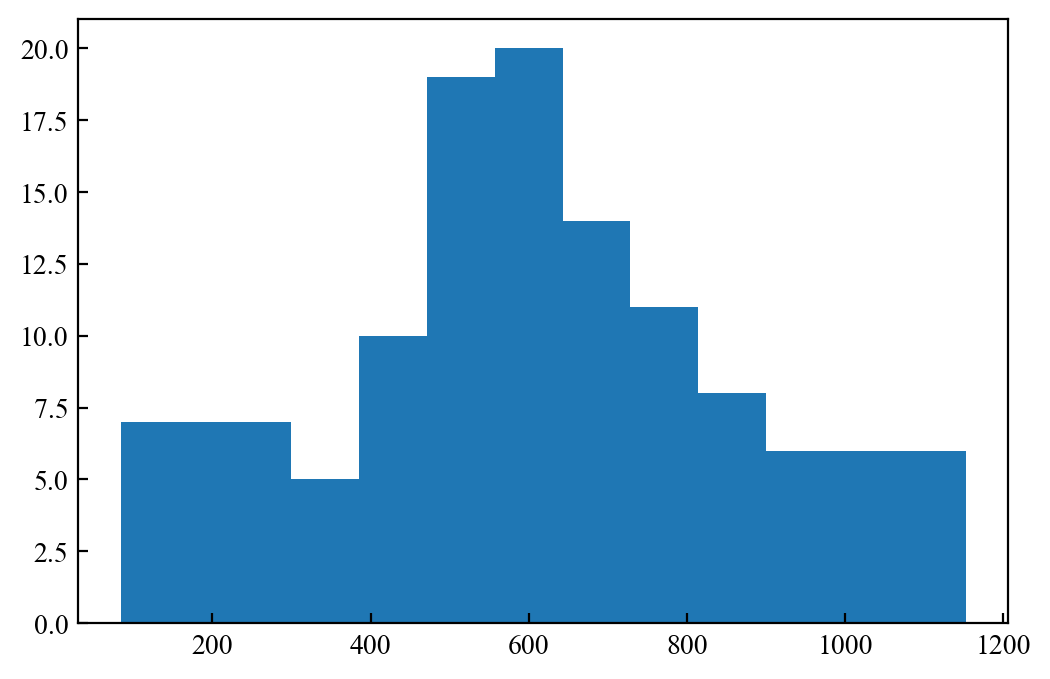

In [10]:
n = len(data)
m = 8
x1 = data.min()
x2 = data.max()
x = np.linspace(300, 900, m)
qt = np.hstack([x1, x, x2]) # 分点
h = plt.hist(data, qt)
f = h[0]

In [11]:
p0 = ss.norm.cdf(x, mu, sig)
p = np.hstack([p0[0], np.diff(p0), 1-p0[-1]])      # 各区间概率
obs_freq = f
exp_freq = p*n
obs_freq, exp_freq

(array([ 7.,  5., 10., 19., 20., 14., 11.,  8.,  6.]),
 array([ 6.35404751,  7.43609974, 11.86938294, 15.71351359, 17.25391244,
        15.71351359, 11.86938294,  7.43609974,  6.35404751]))

In [12]:
chis, p = ss.chisquare(obs_freq, exp_freq, ddof=2)
k = len(obs_freq)
r = 2
chisa = ss.chi2.ppf(0.95, k-r-1)
print(f'{chis  = }\n{p = }\n{chisa = }')

chis  = 2.5956174045925717
p = 0.8576168235726485
chisa = 12.591587243743977


$\chi^2 < \chi_{0.05}^2(k-r-1)$，故在显著性水平 $\alpha=0.05$ 下，接受 $H_0$，即认为服从正态分布 $N(600, 196.63^2)$，故下面可直接用此分布进行计算

2）

In [13]:
from scipy.integrate import quad
f = 200     # 故障时产出零件的损失费用 ￥/件
t = 10      # 进行检查的费用 ￥/次
d = 3000    # 发现故障进行调节以恢复正常的费用 ￥/次
k = 1000    # 未发现故障时更换一把新刀具的费用 ￥/次
G = lambda x: ss.norm.cdf(x, mu, sig)
n = np.arange(15, 41)
s = np.arange(10, 31)
TEL = []

In [14]:
for i in n:         # 检查间隔
    for j in s:
        m = i*j     # 更换周期
        I = quad(G, 0, m-i)[0]
        EC=(((j-1)*t+k)*(1-G(m))+t/i*(m-i)*G(m-i)+
        (d+(i+1)*f/2)*(G(m-i)-G(0))-t/i*I)
        ER=m-m*G(m)+(m-i)*G(m-i)-I
        TEL.append([i, m, EC/ER])
TEL=np.array(TEL); ind=np.argmin(TEL[:,2])  #求最小值的地址
n0=TEL[ind,0]; m0=TEL[ind,1]
print('检查间隔：', n0); print('更换周期：', m0)
print('最小费用为：', TEL[ind,2])

检查间隔： 31.0
更换周期： 341.0
最小费用为： 4.402746462138195
